In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv('../data/Lingua Franca NEAMT Evaluation (numerical placeholders) - MT Evaluation Results (All).tsv', sep='\t')

In [12]:
df.head()

,Test Name,Source Language,Components,Gold File,Prediction File,Uploaded Gold File,Uploaded Prediction File,Experiment URI,System,Reference,BLEU,BLEU NLTK,METEOR,chrF++,TER,Error Count,Timestamp,GERBIL version
0,QALD10-MT,de,"['babelscape_ner', 'mag_el', 'libre_mt']",QALD10-MT_de-en_gold_file,pred_results/QALD10-MT_de-babelscape_ner-mag_e...,a1205346455a40bbbe969013a0b4947bQALD10-MT_de-e...,d53407c7ac67404d94f0ec91e9ae9033QALD10-MT_de-b...,https://beng.dice-research.org/gerbil/experime...,pred (uploaded),gold (uploaded),25.20,0.25,0.35,0.56,0.56,0,2022-09-19 19:23:06,1.2.7
1,QALD10-MT,de,"['babelscape_ner', 'mag_el', 'opus_mt']",QALD10-MT_de-en_gold_file,pred_results/QALD10-MT_de-babelscape_ner-mag_e...,a1205346455a40bbbe969013a0b4947bQALD10-MT_de-e...,835b61d61ea542f681ee893107e6a8faQALD10-MT_de-b...,https://beng.dice-research.org/gerbil/experime...,pred (uploaded),gold (uploaded),33.63,0.33,0.39,0.63,0.47,0,2022-09-19 19:23:17,1.2.7
2,QALD10-MT,de,"['babelscape_ner', 'mag_el', 'nllb_mt']",QALD10-MT_de-en_gold_file,pred_results/QALD10-MT_de-babelscape_ner-mag_e...,a1205346455a40bbbe969013a0b4947bQALD10-MT_de-e...,7c7c264f0257473b912ad4f9d0e8473bQALD10-MT_de-b...,https://beng.dice-research.org/gerbil/experime...,pred (uploaded),gold (uploaded),32.18,0.32,0.38,0.61,0.50,0,2022-09-19 19:23:27,1.2.7
3,QALD10-MT,de,"['babelscape_ner', 'mag_el', 'mbart_mt']",QALD10-MT_de-en_gold_file,pred_results/QALD10-MT_de-babelscape_ner-mag_e...,a1205346455a40bbbe969013a0b4947bQALD10-MT_de-e...,628682dd4b9b4f43b214acf3ff3a53f2QALD10-MT_de-b...,https://beng.dice-research.org/gerbil/experime...,pred (uploaded),gold (uploaded),33.14,0.33,0.38,0.62,0.49,0,2022-09-19 19:23:37,1.2.7
4,QALD10-MT,de,"['babelscape_ner', 'mgenre_el', 'libre_mt']",QALD10-MT_de-en_gold_file,pred_results/QALD10-MT_de-babelscape_ner-mgenr...,a1205346455a40bbbe969013a0b4947bQALD10-MT_de-e...,e33b42660d4c4b6c8c96f4e160fbbfcbQALD10-MT_de-b...,https://beng.dice-research.org/gerbil/experime...,pred (uploaded),gold (uploaded),25.89,0.26,0.35,0.57,0.54,0,2022-09-19 19:23:47,1.2.7


In [13]:
df = df[['Test Name', 'Source Language', 'Components', 'BLEU', 'chrF++', 'TER', 'METEOR']]

In [14]:
df.head()

,Test Name,Source Language,Components,BLEU,chrF++,TER,METEOR
0,QALD10-MT,de,"['babelscape_ner', 'mag_el', 'libre_mt']",25.20,0.56,0.56,0.35
1,QALD10-MT,de,"['babelscape_ner', 'mag_el', 'opus_mt']",33.63,0.63,0.47,0.39
2,QALD10-MT,de,"['babelscape_ner', 'mag_el', 'nllb_mt']",32.18,0.61,0.50,0.38
3,QALD10-MT,de,"['babelscape_ner', 'mag_el', 'mbart_mt']",33.14,0.62,0.49,0.38
4,QALD10-MT,de,"['babelscape_ner', 'mgenre_el', 'libre_mt']",25.89,0.57,0.54,0.35


In [15]:
df['is_std'] = df.Components.str.contains('no_')

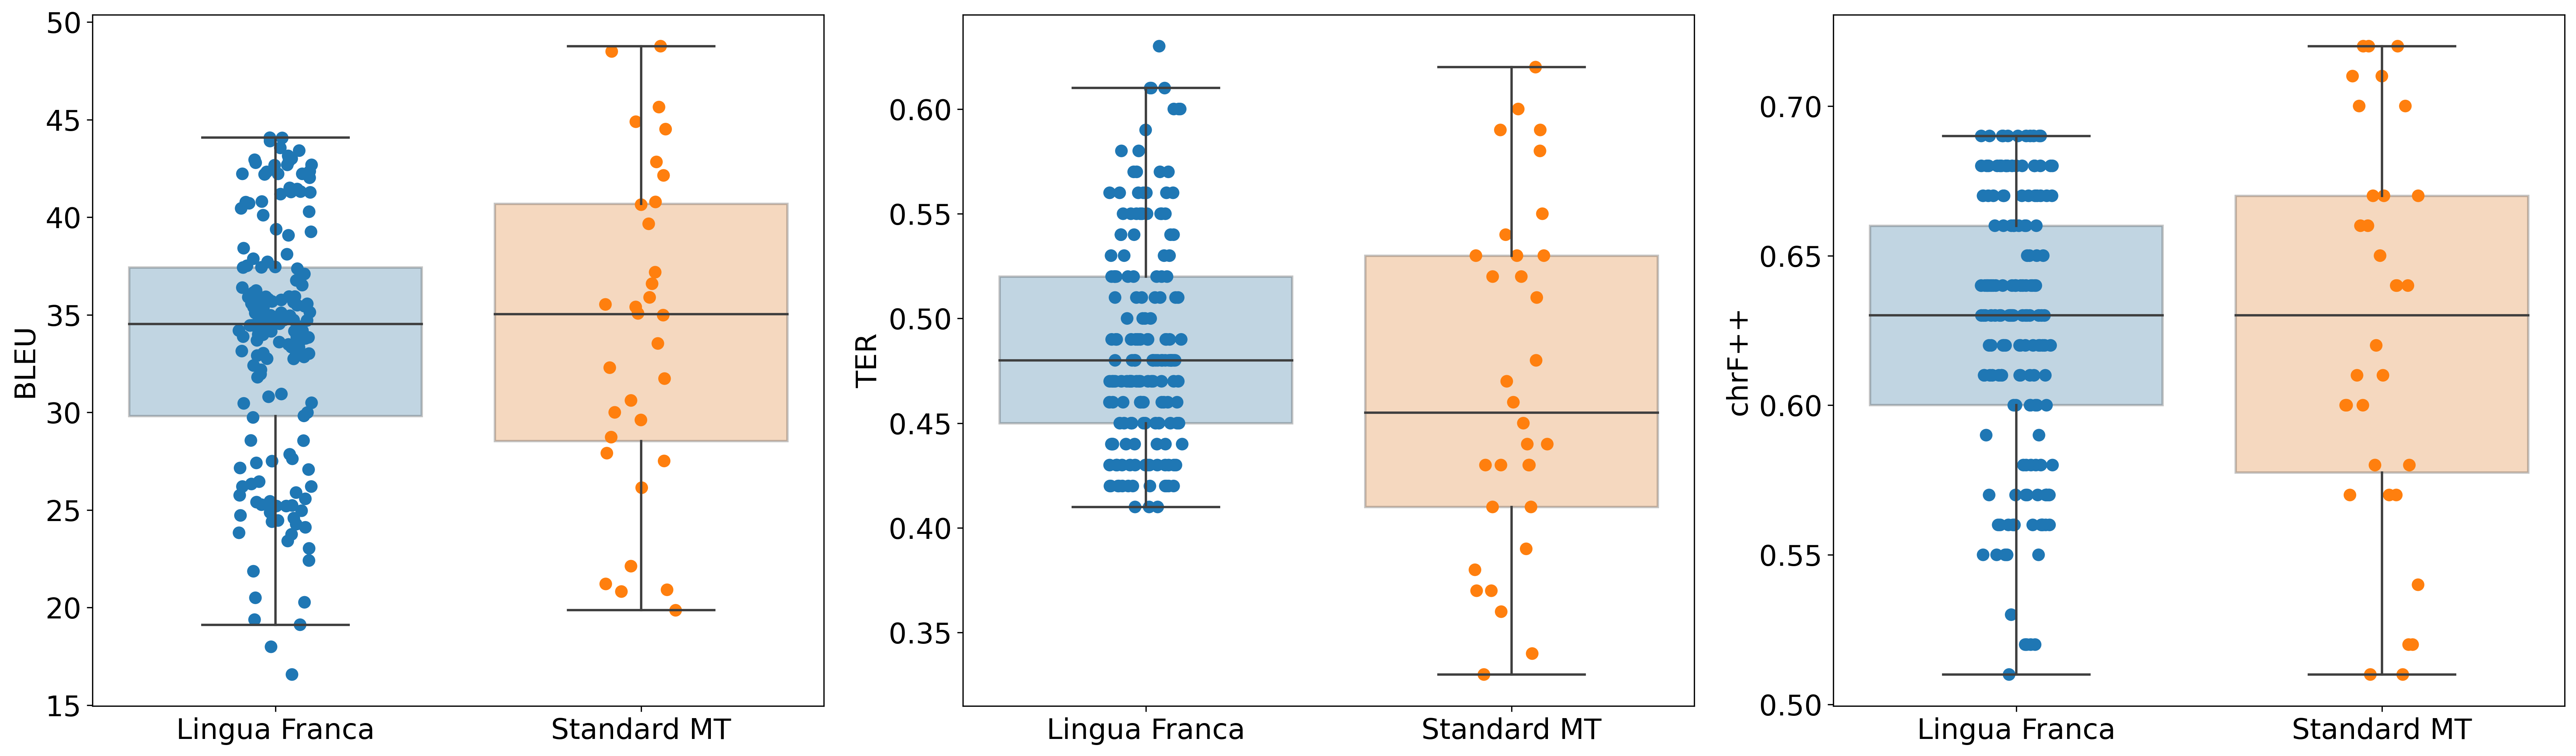

In [42]:
plt.rcParams['font.size'] = 18

metrics = ['BLEU', 'TER', 'chrF++']
fig, axs = plt.subplots(ncols=len(metrics), figsize=(23, 7), dpi=300)

for i, metric in enumerate(metrics):
    sns.stripplot(x='is_std', y=metric, hue='is_std', data=df, ax=axs[i], size=8)
    sns.boxplot(showmeans=False,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': True},
            whiskerprops={'visible': True},
            zorder=10,
            x="is_std",
            y=metric,
            data=df,
            showfliers=False,
            boxprops=dict(alpha=.3),
            showbox=True,
            showcaps=True,
            ax=axs[i])
    axs[i].set_xticklabels(['Lingua Franca', 'Standard MT'])
    axs[i].set_xlabel("")
    # axs[i].set_ylabel('')
    # axs[i].set_ylim(0, 1)
    axs[i].legend().remove()

plt.tight_layout()
plt.savefig('../data/img/strip-plot-all.pdf')